In [1]:
%matplotlib notebook
from ipywidgets import *

import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator
import numpy as np
from math import *

from matplotlib.widgets import Slider, Button

import random

In [2]:
S = np.array([5,3,5])
T = 100
N = 10000
options = [-1, 0, 1]

In [3]:
def getNext(stencil):
    res = random.randint(0, sum(stencil) - 1)
    if res < stencil[0]:
        return -1
    elif res < stencil[0] + stencil[1]:
        return 0
    else:
        return 1

In [4]:
def runOneExp(S, T):
    res = 0
    for i in range(T):
        res += getNext(S)
    return res

In [9]:
def runOneExpWithOp(S, T, option='withT', VERBOSE=False):
    res = 0
    for i_t in range(1, T+1, 1):
        iterS = []
        if option == 'withT':
            iterS = S * i_t
        elif option == 'noMiddleT':
            iterS = S * i_t
            iterS[1] = S[1]
        elif option == 'middleT':
            iterS = S * 1
            iterS[1] = S[1] * i_t
        if VERBOSE:
            print(iterS)
        res += getNext(iterS)
    return res

In [10]:
def getVals(S, T, N, option='withT', VERBOSE=False):
    vals = np.ones([T, N])
    for i_T in range(1, T+1, 1):
        if VERBOSE and i_T % 10 == 0:
            print(i_T)
        for i_N in range(1, N+1, 1):
            vals[i_T-1, i_N-1] = runOneExpWithOp(S, i_T, option)
    return vals

In [6]:
# def plotStencil(S, N, T):
#     val = [0] * N
#     for i in range(N):
#         val[i] = runOneExp(S, T)
# #     print(val)
#     plt.figure()
#     plt.hist(val, bins=max(val) - min(val) + 1, density=False)
#     plt.show()

### Time dependent stencil

symmetric, 5t, 3t, 5t

In [11]:
def getVals(S, T, N, option='withT', VERBOSE=False):
    vals = np.ones([T, N])
    for i_T in range(1, T+1, 1):
        if VERBOSE and i_T % 10 == 0:
            print(i_T)
        for i_N in range(1, N+1, 1):
            vals[i_T-1, i_N-1] = runOneExpWithOp(S, i_T, option)
    return vals

In [12]:
S = np.array([5,3,5])
T = 100
N = 10000
vals = getVals(S, T, N, 'withT', True)

10
20
30
40
50
60
70
80
90
100


In [13]:
for i in range(3):
    print(vals[i, 0:10])

[-1.  1.  0.  1. -1. -1. -1.  1. -1. -1.]
[ 0.  2.  0.  0.  2.  0.  0.  0.  2. -2.]
[ 1.  2.  2. -2. -1.  2.  0.  0.  0.  0.]


<IPython.core.display.Javascript object>


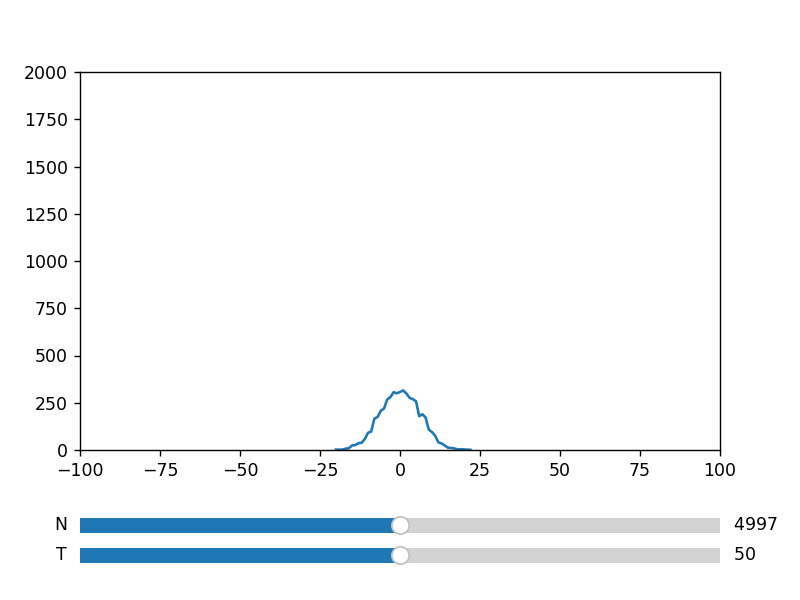

In [16]:
fig, ax = plt.subplots()

unique, counts = np.unique(vals[T//2, 0:N//2], return_counts=True)
p, = ax.plot(unique, counts)
plt.axis([-T, T, 0, N//5])
plt.subplots_adjust(left=0.1, bottom=0.25)

axN = plt.axes([0.1, 0.1, 0.8, 0.05])
sliderN = Slider(
    ax=axN,
    label='N',
    valmin=0,
    valmax=N,
    valinit=N//2,
)

axT = plt.axes([0.1, 0.05, 0.8, 0.05])
sliderT = Slider(
    ax=axT,
    label='T',
    valmin=0,
    valmax=T,
    valinit=T//2,
)

def update(val):
    val_T = int(sliderT.val)-1
    val_N = int(sliderN.val)-1
    unique, counts = np.unique(vals[val_T, 0:val_N], return_counts=True)
    p.set_xdata(unique)
    p.set_ydata(counts)

sliderN.on_changed(update)
sliderT.on_changed(update)
plt.show()

symmetric: 5t, 3(no t here), 5t

In [17]:
S = np.array([5,3,5])
T = 100
N = 10000
vals = getVals(S, T, N, 'noMiddleT', True)

10
20
30
40
50
60
70
80
90
100


In [18]:
for i in range(3):
    print(vals[i, 0:10])

[-1. -1. -1.  1.  1. -1.  1.  0. -1.  0.]
[ 0.  1.  2. -1.  0. -1.  2.  0.  2. -2.]
[ 0.  1. -2.  1. -1. -1. -2. -1.  1. -1.]


<IPython.core.display.Javascript object>


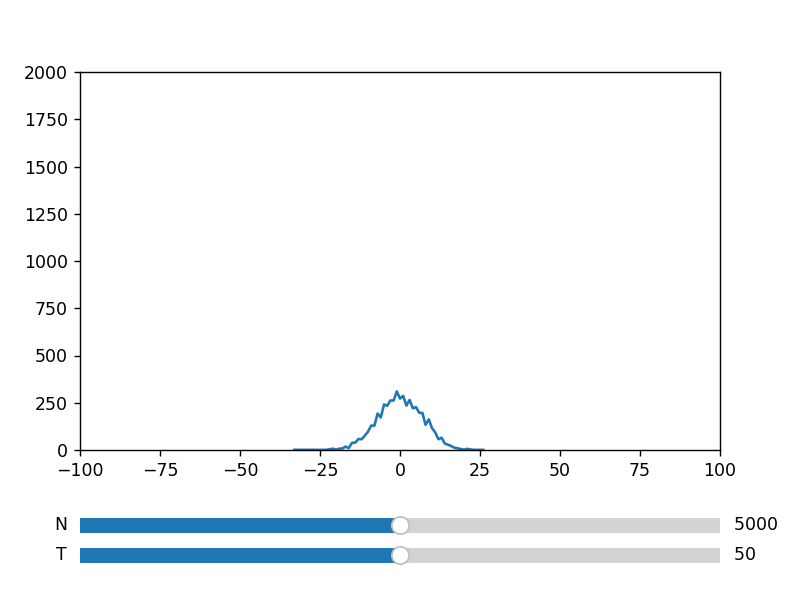

In [19]:
fig, ax = plt.subplots()

unique, counts = np.unique(vals[T//2, 0:N//2], return_counts=True)
p, = ax.plot(unique, counts)
plt.axis([-T, T, 0, N//5])
plt.subplots_adjust(left=0.1, bottom=0.25)

axN = plt.axes([0.1, 0.1, 0.8, 0.05])
sliderN = Slider(
    ax=axN,
    label='N',
    valmin=0,
    valmax=N,
    valinit=N//2,
)

axT = plt.axes([0.1, 0.05, 0.8, 0.05])
sliderT = Slider(
    ax=axT,
    label='T',
    valmin=0,
    valmax=T,
    valinit=T//2,
)



sliderN.on_changed(update)
sliderT.on_changed(update)
plt.show()

symmetric: 5, 3t, t

In [20]:
S = np.array([5,3,5])
T = 100
N = 10000
op = 'middleT'

vals = getVals(S, T, N, op, True)

10
20
30
40
50
60
70
80
90
100


In [21]:
for i in range(3):
    print(vals[i, 0:10])

[-1.  1. -1.  0.  0.  1.  1.  1.  0.  0.]
[-2.  1. -2.  0.  0.  1.  0. -2.  0.  1.]
[-1.  0. -1. -2.  2.  0.  1. -1.  2. -2.]


<IPython.core.display.Javascript object>


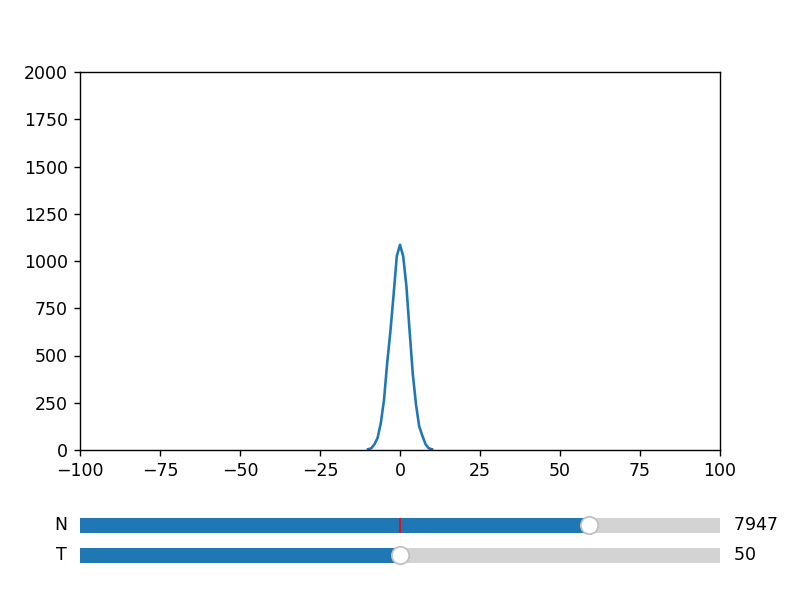

In [22]:
S = np.array([5,3,5])
T = 100
N = 10000
op = 'middleT'

fig, ax = plt.subplots()

unique, counts = np.unique(vals[T//2, 0:N//2], return_counts=True)
p, = ax.plot(unique, counts)
plt.axis([-T, T, 0, N//5])
plt.subplots_adjust(left=0.1, bottom=0.25)

axN = plt.axes([0.1, 0.1, 0.8, 0.05])
sliderN = Slider(
    ax=axN,
    label='N',
    valmin=0,
    valmax=N,
    valinit=N//2,
)

axT = plt.axes([0.1, 0.05, 0.8, 0.05])
sliderT = Slider(
    ax=axT,
    label='T',
    valmin=0,
    valmax=T,
    valinit=T//2,
)

def update(val):
    val_T = int(sliderT.val)-1
    val_N = int(sliderN.val)-1
    unique, counts = np.unique(vals[val_T, 0:val_N], return_counts=True)
    p.set_xdata(unique)
    p.set_ydata(counts)

sliderN.on_changed(update)
sliderT.on_changed(update)
plt.show()